In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Step 2: Generate synthetic dataset (simulating real-world data)
np.random.seed(42)  # For reproducibility
n_observations = 1000

# Simulate independent variables
education = np.random.normal(12, 2, n_observations)  # Years of education (mean=12)
experience = np.random.gamma(5, 1.5, n_observations) # Years of experience (skewed)

# Generate income with true parameters and noise
true_intercept = 20000
true_edu_coef = 5000
true_exp_coef = 3000
noise = np.random.normal(0, 10000, n_observations)

income = (true_intercept +
          true_edu_coef * education +
          true_exp_coef * experience +
          noise)

# Create DataFrame
df = pd.DataFrame({'income': income,
                   'education': education,
                   'experience': experience})

Dataset Head:
          income  education  experience
0  121551.477347  12.993428   12.583998
1  103593.655874  11.723471   10.443959
2  125450.422378  13.295377    7.195008
3  107335.827801  15.046060    5.105986
4  126943.712948  11.531693   10.319892

Descriptive Statistics:
              income    education   experience
count    1000.000000  1000.000000  1000.000000
mean   102944.747366    12.038664     7.622490
std     17111.798581     1.958432     3.302740
min     56926.845529     5.517465     1.066387
25%     91097.033007    10.704819     5.157579
50%    103021.603152    12.050601     7.142097
75%    113492.178651    13.295888     9.413674
max    173771.731651    19.705463    21.564352


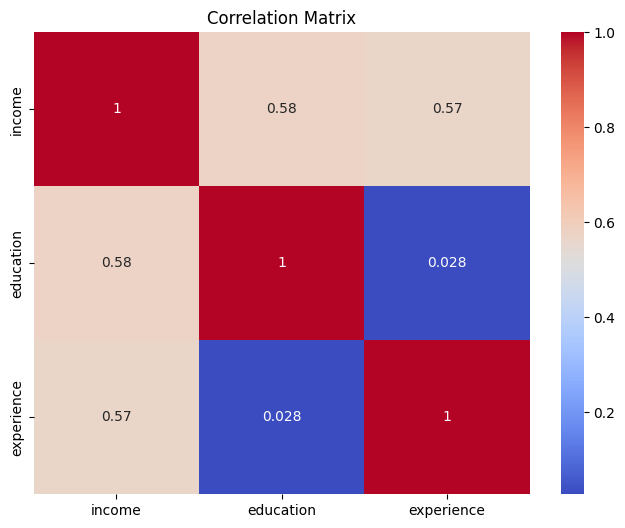

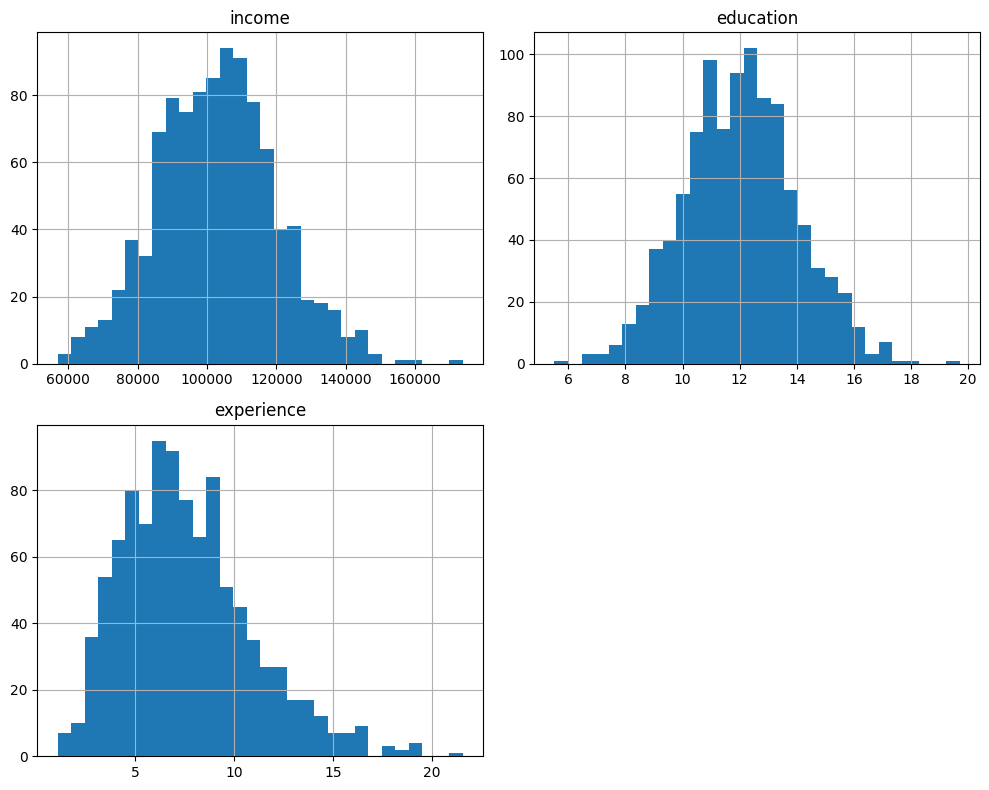

In [4]:
# Step 3: Exploratory Data Analysis
print("Dataset Head:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of variables
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [5]:
# Step 4: Specify and fit the econometric model
X = df[['education', 'experience']]
X = sm.add_constant(X)  # Add intercept term
y = df['income']

model = sm.OLS(y, X)
results = model.fit()


REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sat, 27 Sep 2025   Prob (F-statistic):          5.88e-219
Time:                        15:36:25   Log-Likelihood:                -10662.
No. Observations:                1000   AIC:                         2.133e+04
Df Residuals:                     997   BIC:                         2.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.213e+04   2155.744

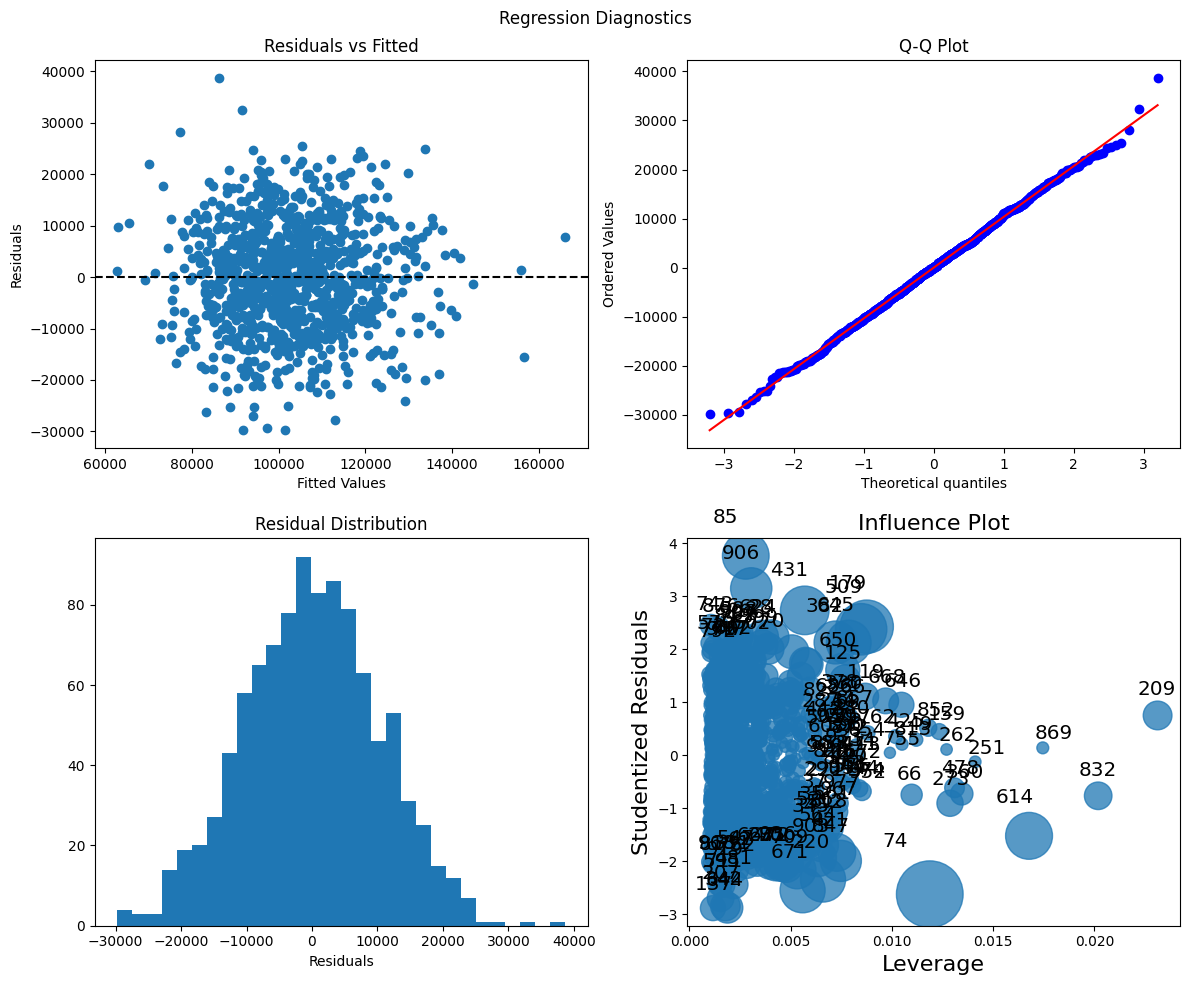

In [6]:
# Step 5: Model diagnostics and results
print("\n" + "="*50)
print("REGRESSION RESULTS")
print("="*50)
print(results.summary())

# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Regression Diagnostics')

# Residuals vs Fitted
axes[0,0].scatter(results.fittedvalues, results.resid)
axes[0,0].axhline(y=0, color='black', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted')

# Q-Q plot
stats.probplot(results.resid, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# Residual histogram
axes[1,0].hist(results.resid, bins=30)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_title('Residual Distribution')

# Leverage plot
sm.graphics.influence_plot(results, ax=axes[1,1])
plt.tight_layout()
plt.show()

In [7]:
# Step 6: Hypothesis testing (t-test for coefficients)
print("\nHYPOTHESIS TESTS:")
print(f"Education coefficient p-value: {results.pvalues['education']:.4f}")
print(f"Experience coefficient p-value: {results.pvalues['experience']:.4f}")


HYPOTHESIS TESTS:
Education coefficient p-value: 0.0000
Experience coefficient p-value: 0.0000


In [8]:
# Step 7: Economic interpretation
print("\nECONOMIC INTERPRETATION:")
print(f"Each additional year of education is associated with ${results.params['education']:.2f} higher income")
print(f"Each additional year of experience is associated with ${results.params['experience']:.2f} higher income")
print(f"Base income (with zero education/experience): ${results.params['const']:.2f}")

# Calculate R-squared interpretation
print(f"\nThe model explains {results.rsquared*100:.2f}% of income variation")



ECONOMIC INTERPRETATION:
Each additional year of education is associated with $4909.68 higher income
Each additional year of experience is associated with $2848.15 higher income
Base income (with zero education/experience): $22128.77

The model explains 63.51% of income variation


In [9]:
# Step 8: Prediction example
new_data = pd.DataFrame({'const': [1],
                        'education': [16],
                        'experience': [5]})
prediction = results.predict(new_data)
print(f"\nPredicted income for 16 years education and 5 years experience: ${prediction.values[0]:.2f}")


Predicted income for 16 years education and 5 years experience: $114924.37
